# 1.) LIBRARY PREPARATION

In [2]:
!pip install ucimlrepo
!pip install kagglehub[pandas-datasets]

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# 2.) DATASET PREPARATION

In [4]:
file_path = 'energy_efficiency.csv'
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ulrikthygepedersen/energy-efficiency",
  file_path,)
df

/tmp/ipython-input-4-2005241731.py:2: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 39.2k/39.2k [00:00<00:00, 39.6MB/s]


,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0,16.48,16.61


## OVERVIEW DATASET :

Dataset ini menjelaskan terkait bagaimana karakteristik suatu bangunan dari berbagai aspek yang mempengaruhi penggunaan energi untuk pemanas dan pendingin.

## OVERVIEW FITUR DAN TARGET:

#*FITUR* :

X1 = Relative Compactness  =>	Seberapa kompak bentuk bangunan

X2 = Surface Area          =>	Luas permukaan luar bangunan

X3 = Wall Area             => Total luas dinding

X4 = Roof Area             => Luas atap

X5 = Overall Height        => Tinggi bangunan

X6 = Orientation           => Arah orientasi bangunan

X7 = Glazing Area	         => Persentase area kaca di gedung

X8 = Glazing Area          => Distribution	Distribusi kaca


#*TARGET* :

y1 = Heating Load => kebutuhan energi untuk pemanasan

y2 = Cooling Load => kebutuhan energi untuk pendinginan


# 3.) EDA (EXPLORATORY DATA ANALYSIS)

In [ ]:
df.shape

(768, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    float64
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    float64
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(10)
memory usage: 60.1 KB


In [ ]:
fitur_cols = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution']
df[fitur_cols].describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000


In [ ]:
target_cols = ['heating_load', 'cooling_load']
df[target_cols].describe()

,heating_load,cooling_load
count,768.000000,768.000000
mean,22.307195,24.587760
std,10.090204,9.513306
min,6.010000,10.900000
25%,12.992500,15.620000
50%,18.950000,22.080000
75%,31.667500,33.132500
max,43.100000,48.030000


In [ ]:
df.mean()

,0
relative_compactness,0.764167
surface_area,671.708333
wall_area,318.500000
roof_area,176.604167
overall_height,5.250000
orientation,3.500000
glazing_area,0.234375
glazing_area_distribution,2.812500
heating_load,22.307195
cooling_load,24.587760


In [ ]:
df.mode().iloc[0]

,0
relative_compactness,0.62
surface_area,514.50
wall_area,294.00
roof_area,220.50
overall_height,3.50
orientation,2.00
glazing_area,0.10
glazing_area_distribution,1.00
heating_load,15.16
cooling_load,14.27


In [ ]:
df.median()

,0
relative_compactness,0.75
surface_area,673.75
wall_area,318.50
roof_area,183.75
overall_height,5.25
orientation,3.50
glazing_area,0.25
glazing_area_distribution,3.00
heating_load,18.95
cooling_load,22.08


In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
outliers = (df < lower_bound) | (df > upper_bound)

In [ ]:
anomaly_frame = pd.DataFrame({
    'Nilai Kosong' : df.isnull().sum(),
    'Nilai Duplikat' : df.duplicated().sum(),
 'Outliers' : outliers.sum()
 })
anomaly_frame

,Nilai Kosong,Nilai Duplikat,Outliers
relative_compactness,0,0,0
surface_area,0,0,0
wall_area,0,0,0
roof_area,0,0,0
overall_height,0,0,0
orientation,0,0,0
glazing_area,0,0,0
glazing_area_distribution,0,0,0
heating_load,0,0,0
cooling_load,0,0,0


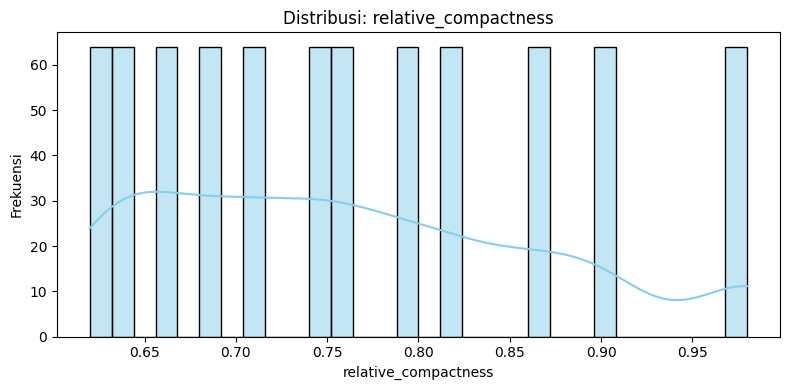

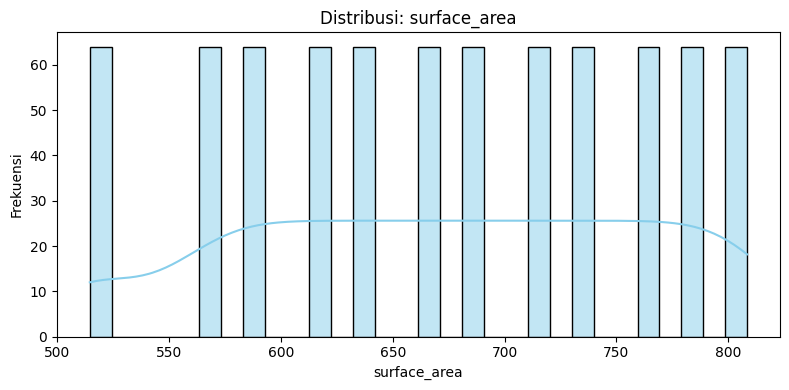

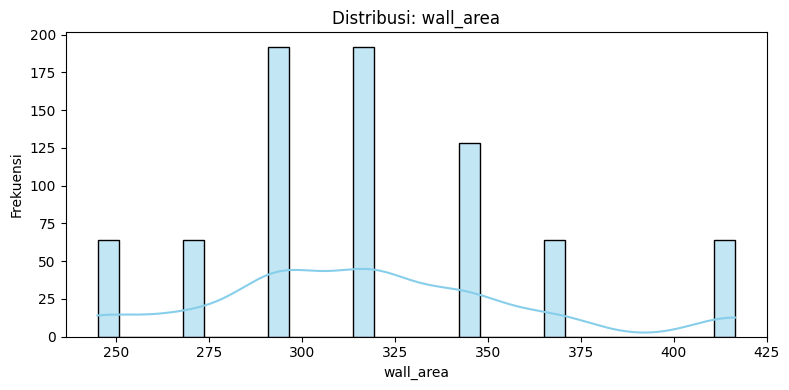

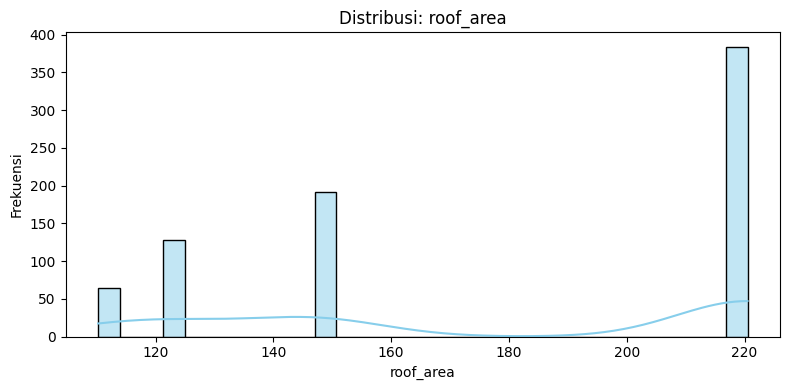

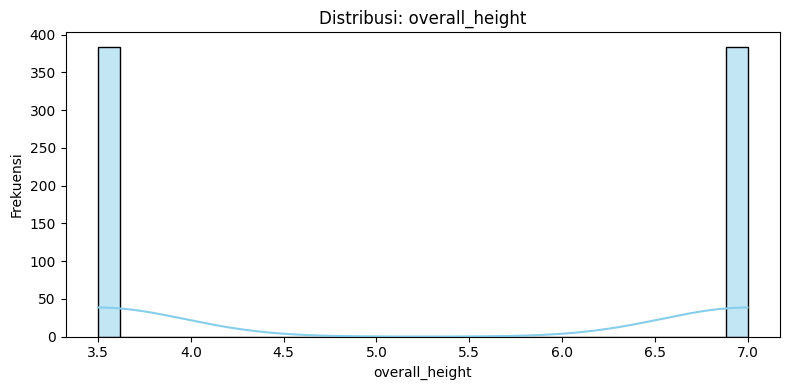

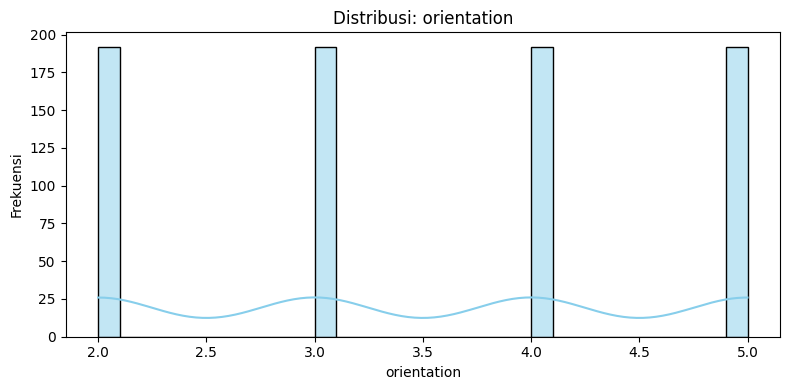

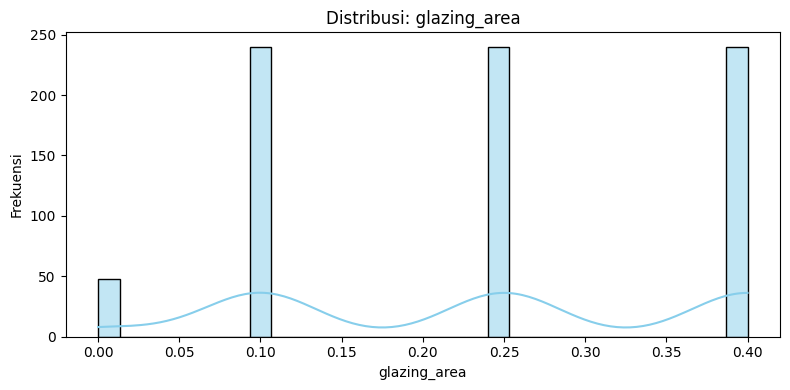

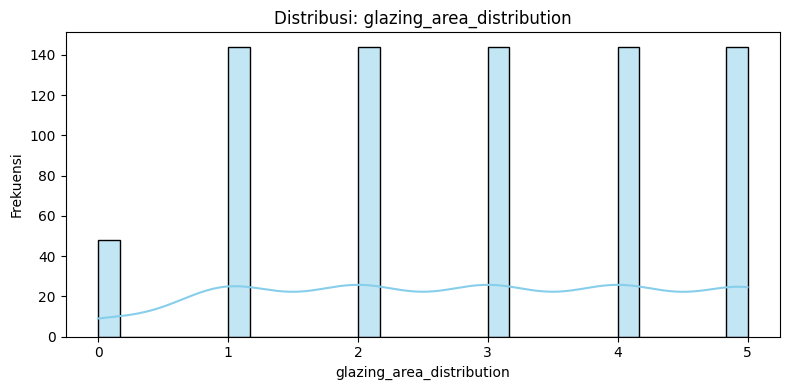

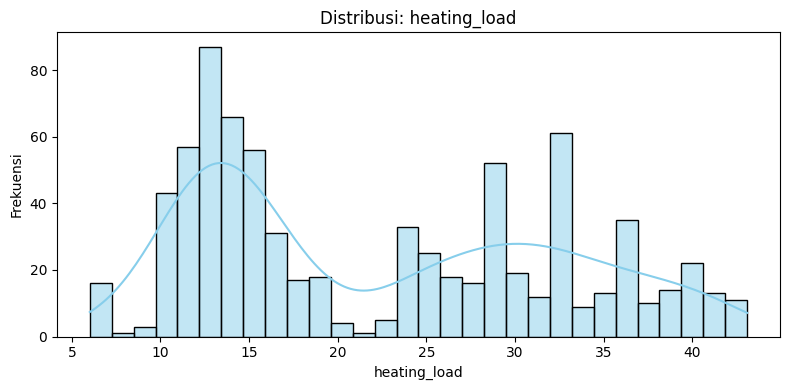

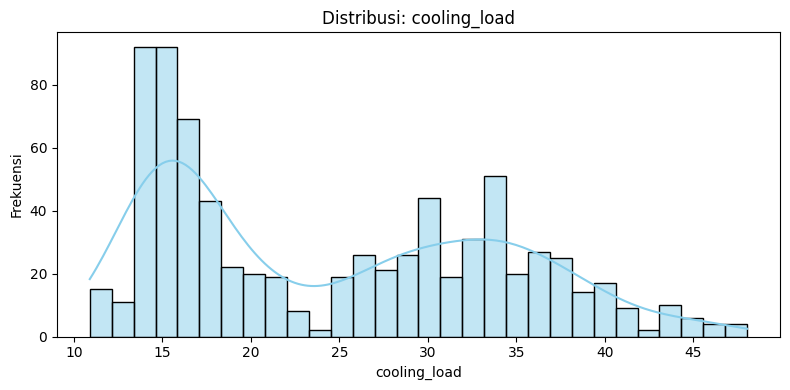

In [ ]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

In [ ]:
df.skew()

,0
relative_compactness,0.495513
surface_area,-0.125131
wall_area,0.533417
roof_area,-0.162764
overall_height,0.000000
orientation,0.000000
glazing_area,-0.060254
glazing_area_distribution,-0.088689
heating_load,0.360446
cooling_load,0.395992


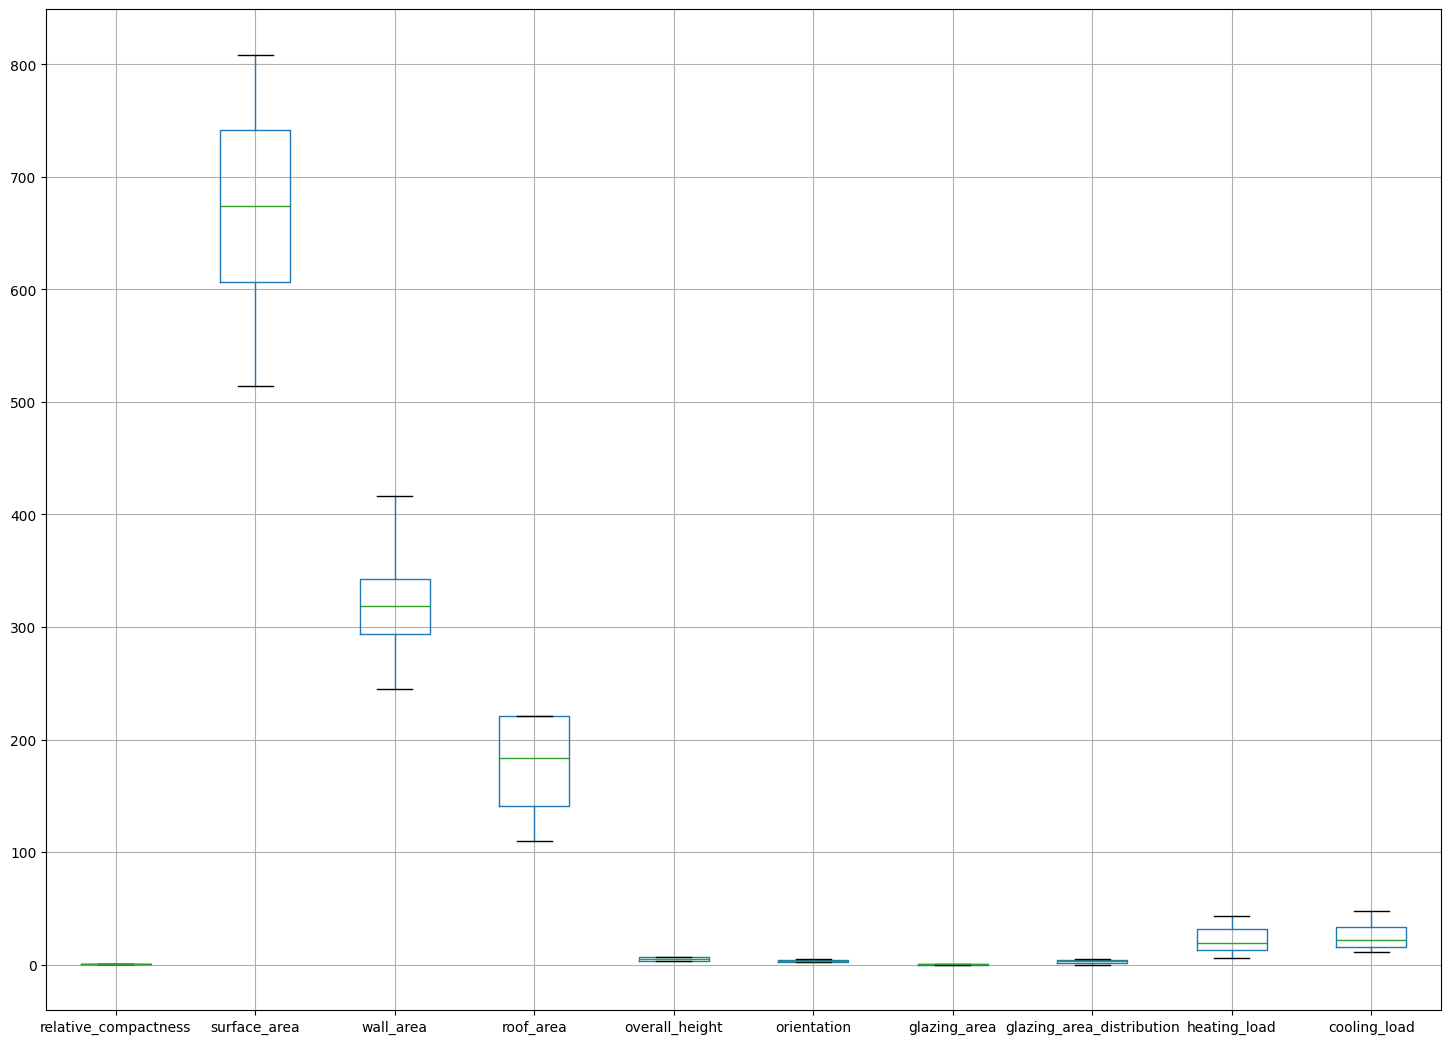

In [ ]:
plt.figure(figsize=(18, 13))
df.boxplot()
plt.show()

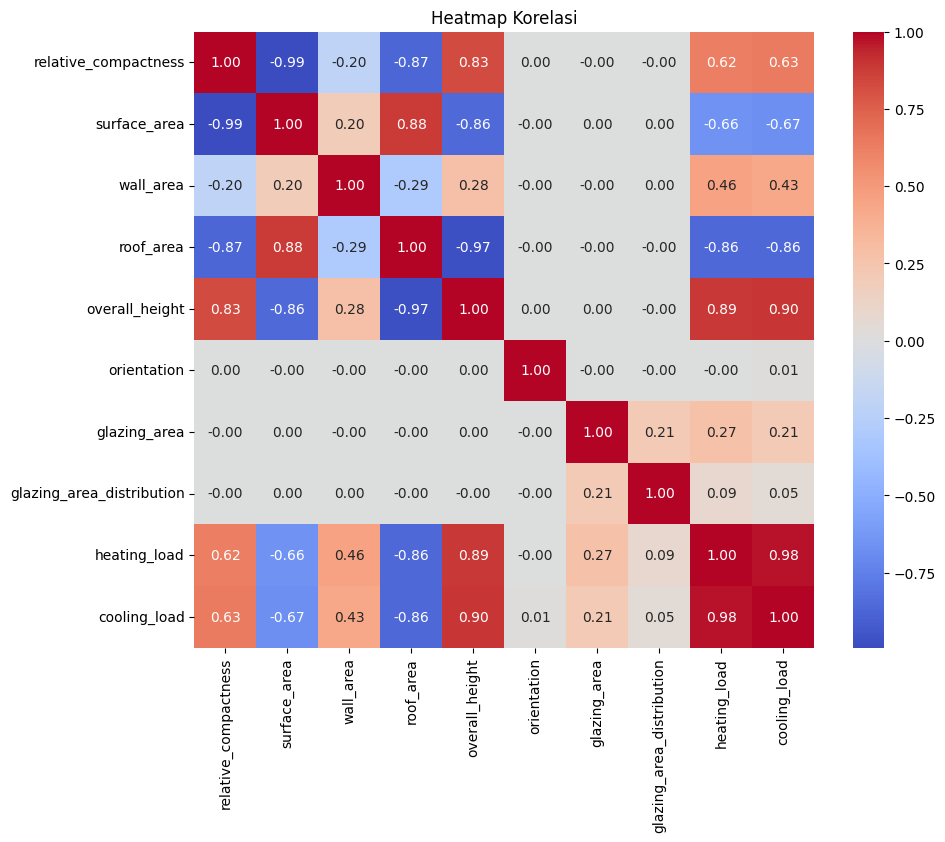

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
df.corr()['heating_load'].sort_values(ascending=False)

,heating_load
heating_load,1.000000
cooling_load,0.975862
overall_height,0.889430
relative_compactness,0.622272
wall_area,0.455671
glazing_area,0.269842
glazing_area_distribution,0.087368
orientation,-0.002587
surface_area,-0.658120
roof_area,-0.861828


In [ ]:
df.corr()['cooling_load'].sort_values(ascending=False)

,cooling_load
cooling_load,1.000000
heating_load,0.975862
overall_height,0.895785
relative_compactness,0.634339
wall_area,0.427117
glazing_area,0.207505
glazing_area_distribution,0.050525
orientation,0.014290
surface_area,-0.672999
roof_area,-0.862547


/tmp/ipython-input-24-1119656859.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y='heating_load', data=df, ci=None)  # ci=None untuk mempercepat
/tmp/ipython-input-24-1119656859.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y='heating_load', data=df, ci=None)  # ci=None untuk mempercepat
/tmp/ipython-input-24-1119656859.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y='heating_load', data=df, ci=None)  # ci=None untuk mempercepat
/tmp/ipython-input-24-1119656859.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y='heating_load', data=df, ci=None)  # ci=None untuk mempercepat
/tmp/ipython-input-24-1119656859.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar

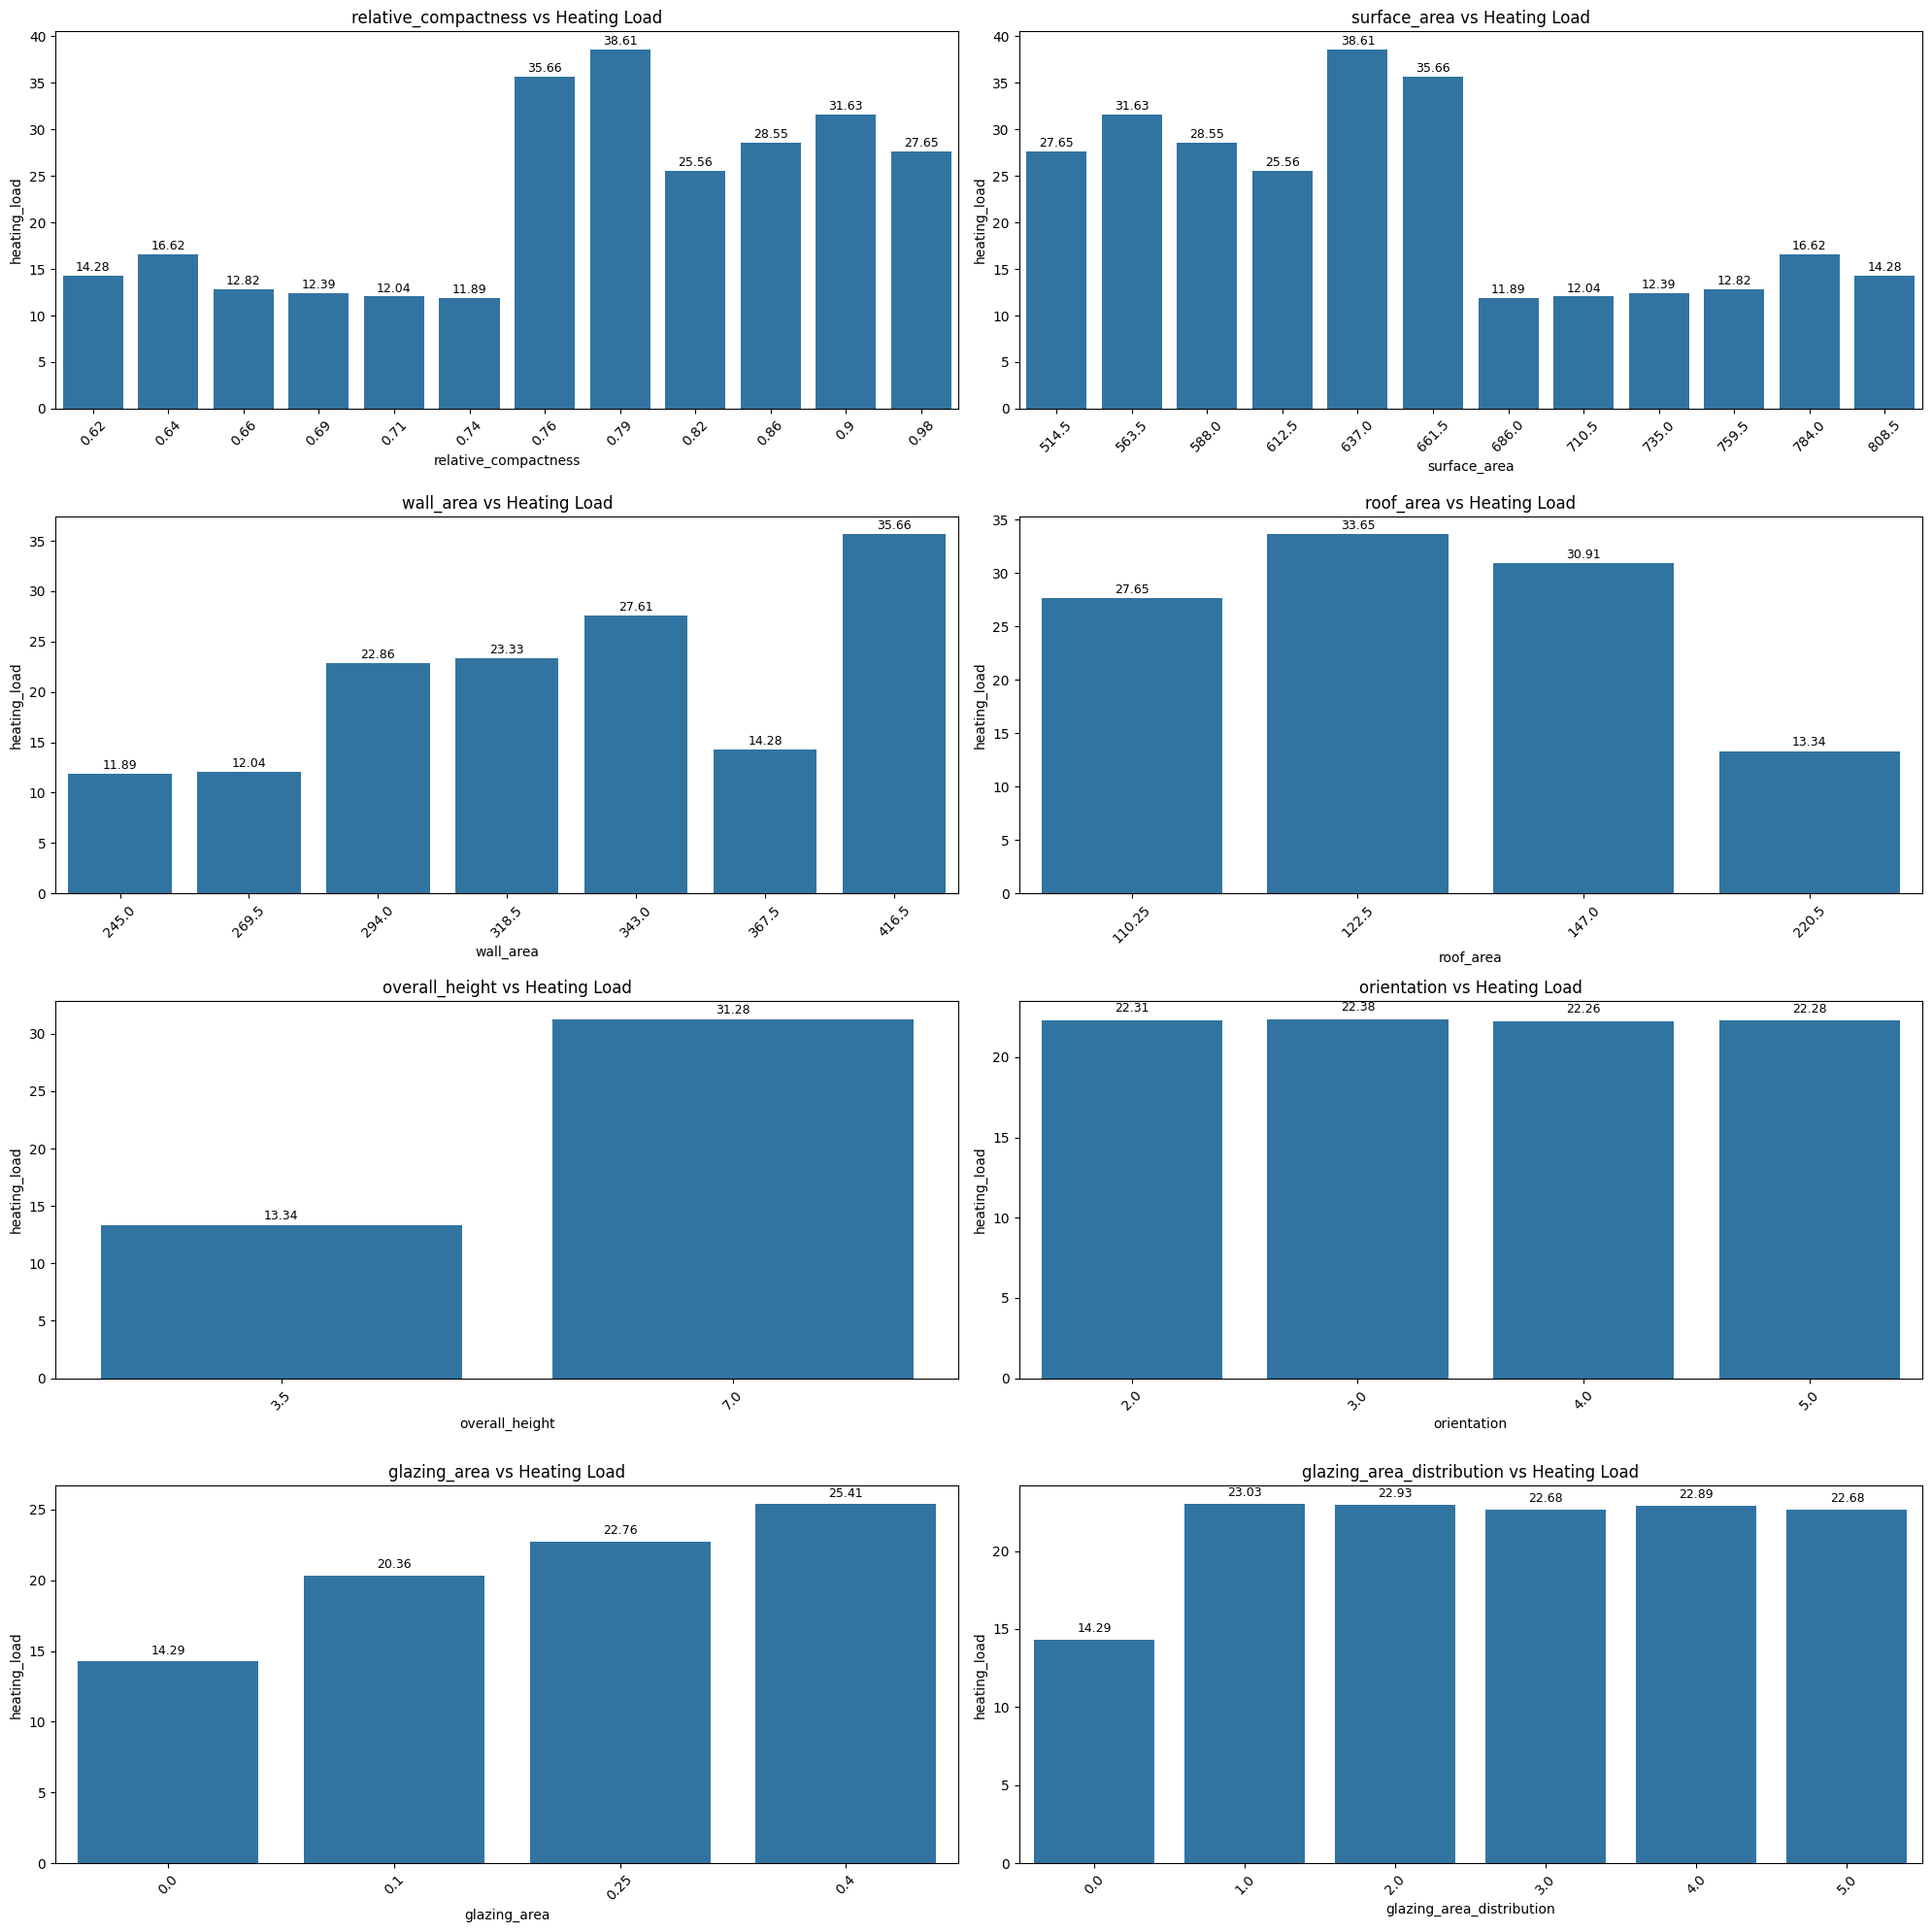

In [ ]:
# Fitur-fitur input
features = [
    'relative_compactness', 'surface_area', 'wall_area', 'roof_area',
    'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution'
]

# Ukuran layout plot
plt.figure(figsize=(20, 20))

# Loop per fitur
for i, col in enumerate(features, 1):
    plt.subplot(4, 2, i)
    ax = sns.barplot(x=col, y='heating_load', data=df, ci=None)  # ci=None untuk mempercepat

    # Tambahkan angka di atas setiap bar
    grouped = df.groupby(col)['heating_load'].mean().reset_index()
    for idx, row in grouped.iterrows():
        ax.text(
            x=idx,
            y=row['heating_load'] + 0.5,  # sedikit di atas bar
            s=f"{row['heating_load']:.2f}",
            ha='center',
            fontsize=9,
            color='black'
        )

    plt.title(f'{col} vs Heating Load')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Heating load tertinggi untuk setiap kolom :


*   Relative Compactness (0.79) = 38.66
*   Surface Area (637) = 38.66

*   Wall Area (343) = 35.66
*   Roof Area (147.00) = 33.65
*   Overall Height (7.0) = 31.26
*   Orientation (3) = 22.38
*   Gllazing Area (0.40) = 25.41  
*   Glazing Area Distribution (2) = 23.03








/tmp/ipython-input-25-50232665.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y='cooling_load', data=df, ci=None)  # ci=None untuk mempercepat
/tmp/ipython-input-25-50232665.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y='cooling_load', data=df, ci=None)  # ci=None untuk mempercepat
/tmp/ipython-input-25-50232665.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y='cooling_load', data=df, ci=None)  # ci=None untuk mempercepat
/tmp/ipython-input-25-50232665.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=col, y='cooling_load', data=df, ci=None)  # ci=None untuk mempercepat
/tmp/ipython-input-25-50232665.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for

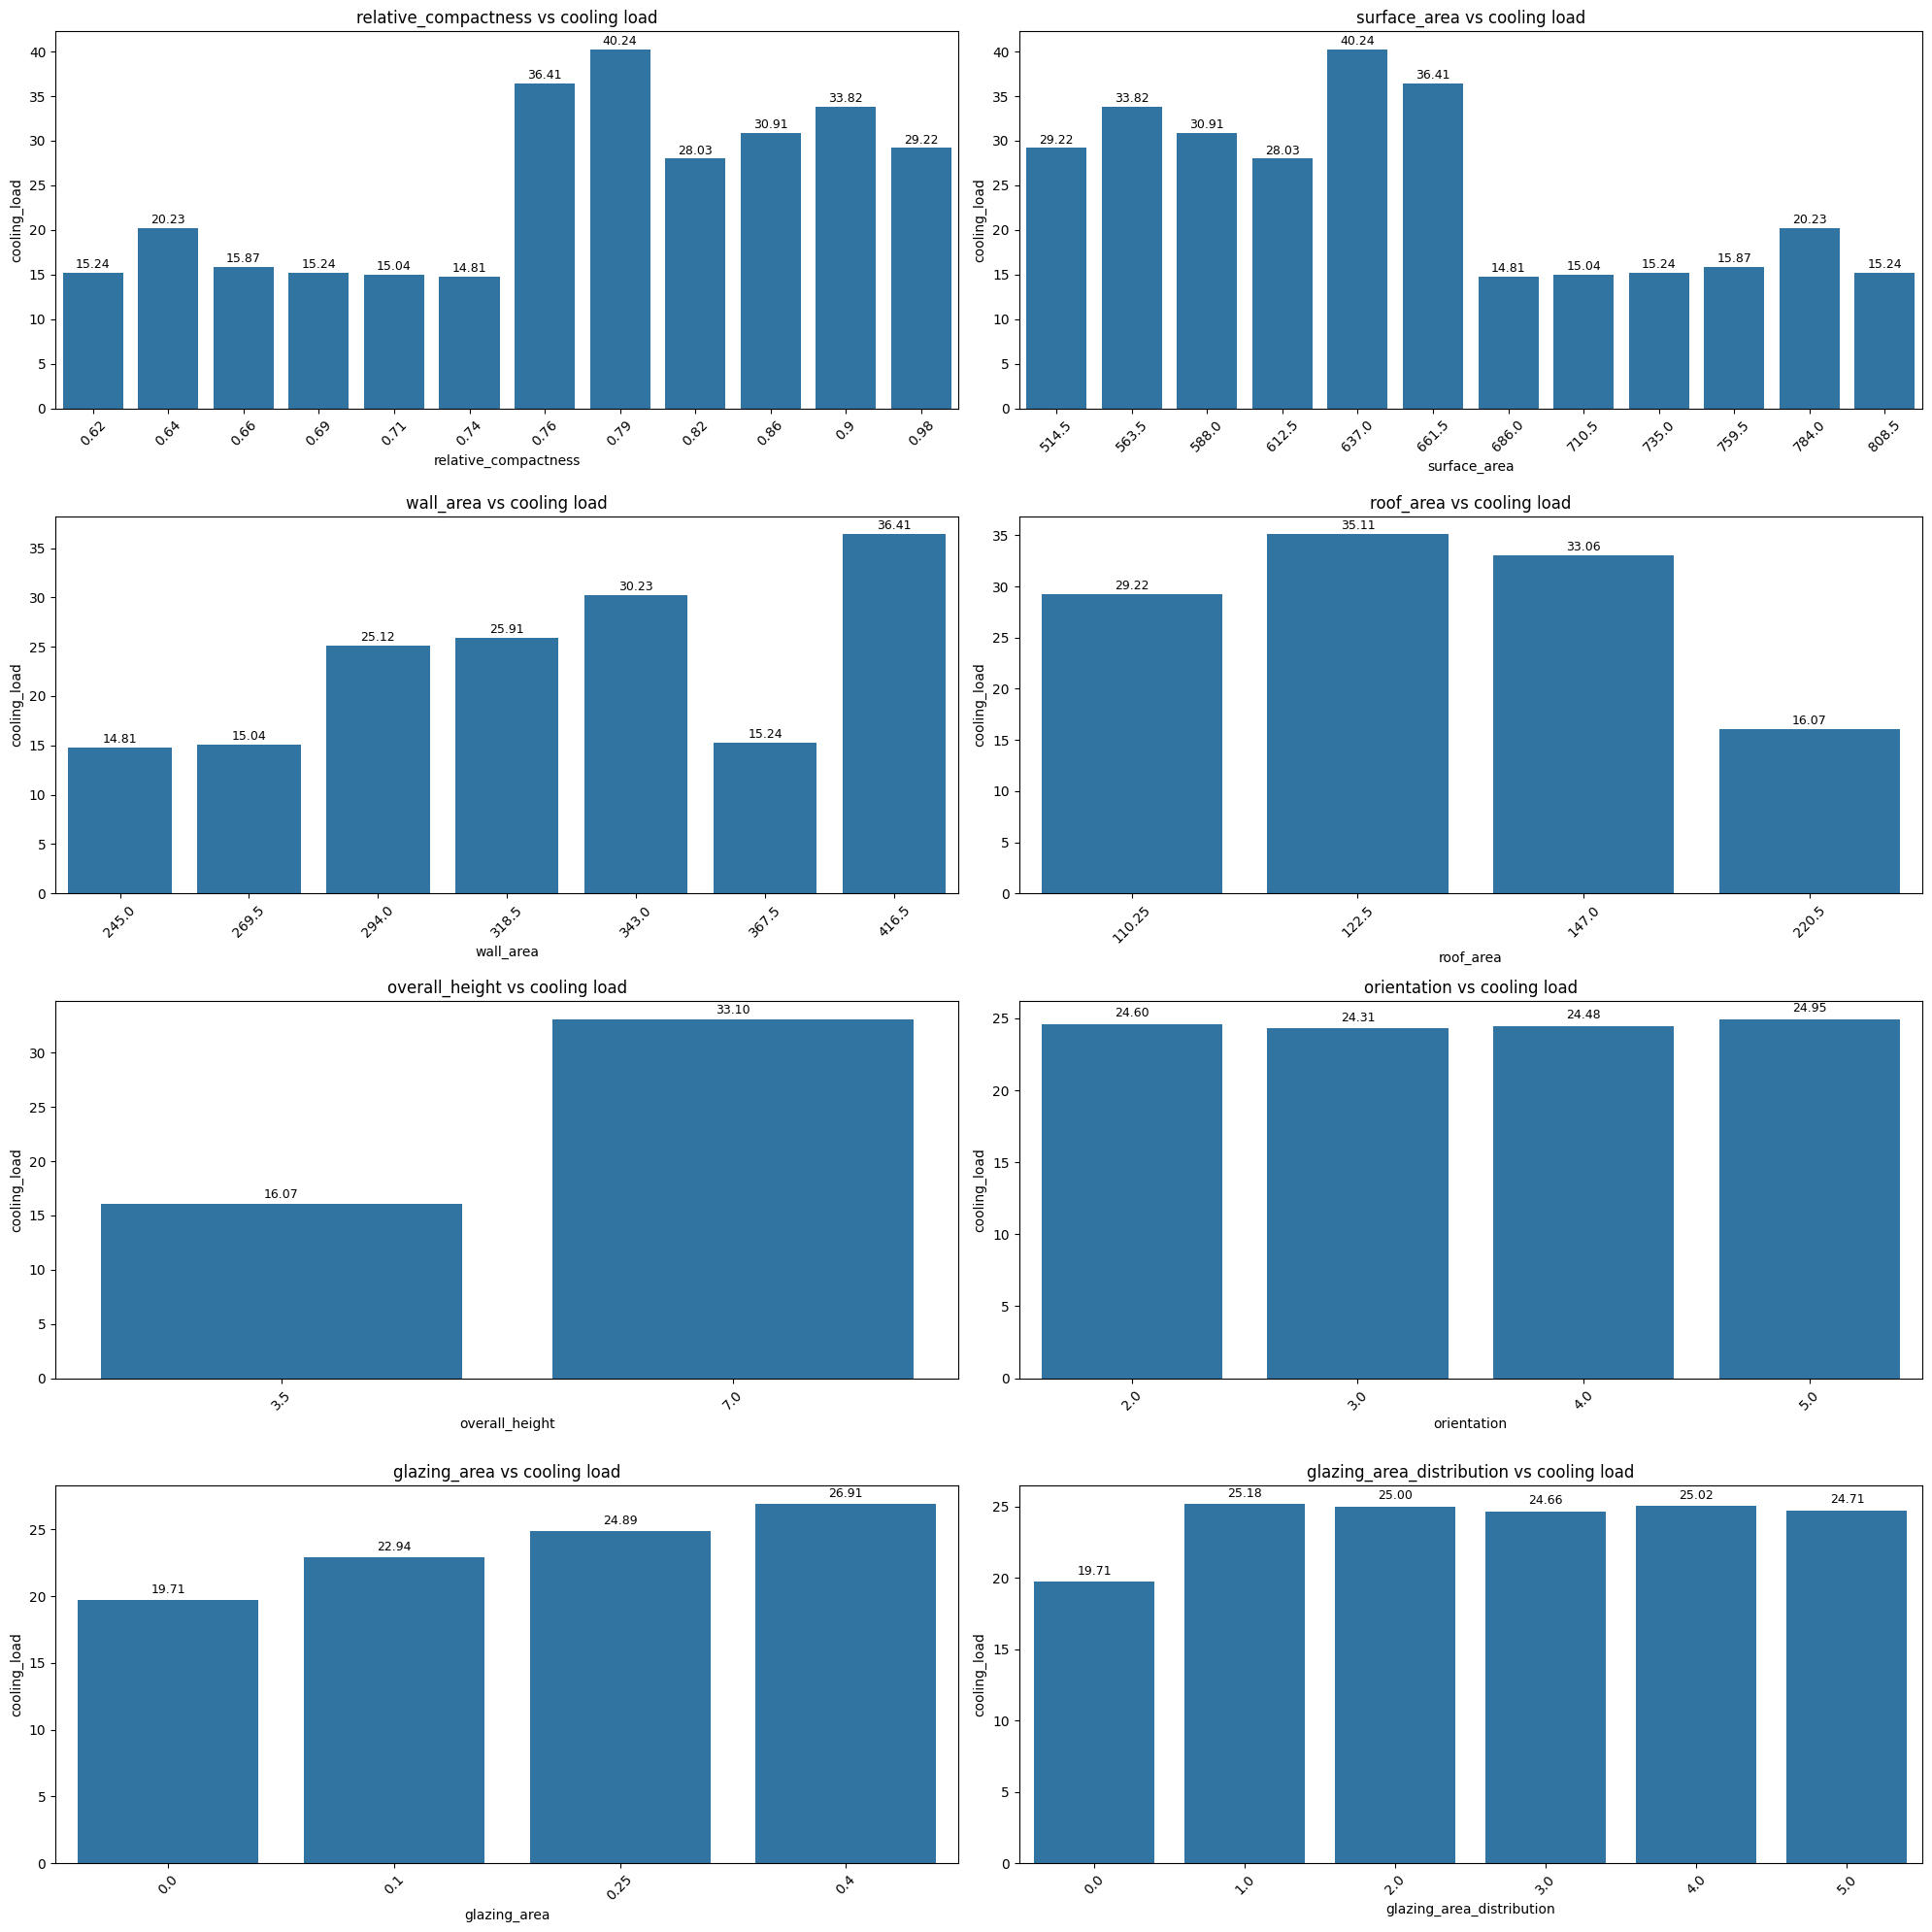

In [ ]:
# Fitur-fitur input
features = [
    'relative_compactness', 'surface_area', 'wall_area', 'roof_area',
    'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution'
]

# Ukuran layout plot
plt.figure(figsize=(20, 20))

# Loop per fitur
for i, col in enumerate(features, 1):
    plt.subplot(4, 2, i)
    ax = sns.barplot(x=col, y='cooling_load', data=df, ci=None)  # ci=None untuk mempercepat

    # Tambahkan angka di atas setiap bar
    grouped = df.groupby(col)['cooling_load'].mean().reset_index()
    for idx, row in grouped.iterrows():
        ax.text(
            x=idx,
            y=row['cooling_load'] + 0.5,  # sedikit di atas bar
            s=f"{row['cooling_load']:.2f}",
            ha='center',
            fontsize=9,
            color='black'
        )

    plt.title(f'{col} vs cooling load')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Cooling load tertinggi untuk setiap kolom :

Relative Compactness (0.79) = 40.24

Surface Area (637) = 40.24

Wall Area (343) = 36.41

Roof Area (147.00) = 35.11

Overall Height (7.0) = 33.10

Orientation (2) = 24.60

Gllazing Area (0.40) = 26.91

Glazing Area Distribution (1) = 25.18

In [ ]:
# Hitung korelasi hanya untuk fitur numerik
corr_matrix = df.corr(numeric_only=True)

# Ambil korelasi ke Heating Load
corr_heating = corr_matrix['heating_load'].drop(['heating_load'], errors='ignore')

# Buang fitur Cooling Load jika masih ikut muncul
if 'cooling_load' in corr_heating.index:
    corr_heating = corr_heating.drop('cooling_load')

# Top 3 korelasi positif dan negatif
top3_positif_heating = corr_heating.sort_values(ascending=False).head(3)
top3_negatif_heating = corr_heating.sort_values().head(3)

# Tampilkan hasil
print("🔵 Top 3 Korelasi Positif terhadap Heating Load:")
print(top3_positif_heating)
print("\n🔴 Top 3 Korelasi Negatif terhadap Heating Load:")
print(top3_negatif_heating)

🔵 Top 3 Korelasi Positif terhadap Heating Load:
overall_height          0.889430
relative_compactness    0.622272
wall_area               0.455671
Name: heating_load, dtype: float64

🔴 Top 3 Korelasi Negatif terhadap Heating Load:
roof_area      -0.861828
surface_area   -0.658120
orientation    -0.002587
Name: heating_load, dtype: float64


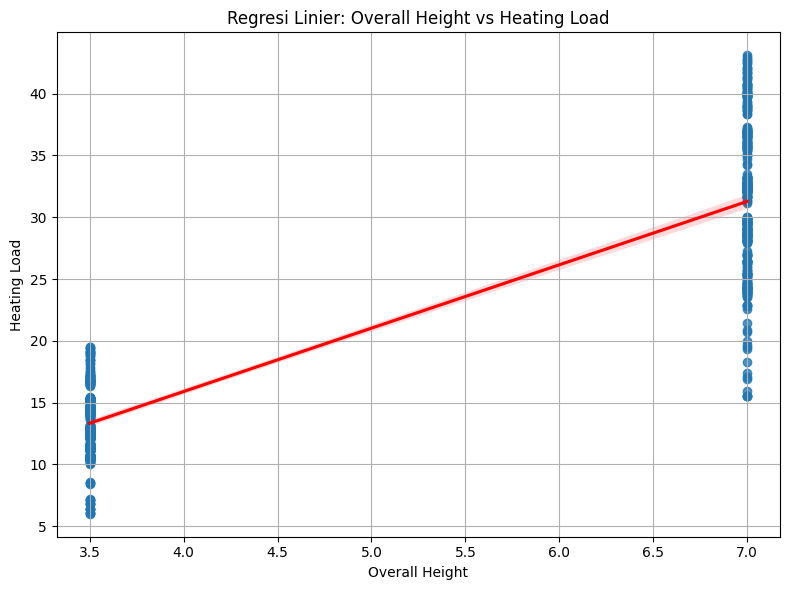

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='overall_height', y='heating_load', data=df, line_kws={'color': 'red'})

plt.title('Regresi Linier: Overall Height vs Heating Load')
plt.xlabel('Overall Height')
plt.ylabel('Heating Load')
plt.grid(True)
plt.tight_layout()
plt.show()

Analisa: Garis regresi (berwarna merah) yang menanjak dari kiri ke kanan dengan jelas menunjukkan adanya korelasi positif antara Overall Height dan Heating Load. Artinya, secara umum, semakin tinggi suatu bangunan (Overall Height), semakin tinggi pula beban pemanasannya (Heating Load).

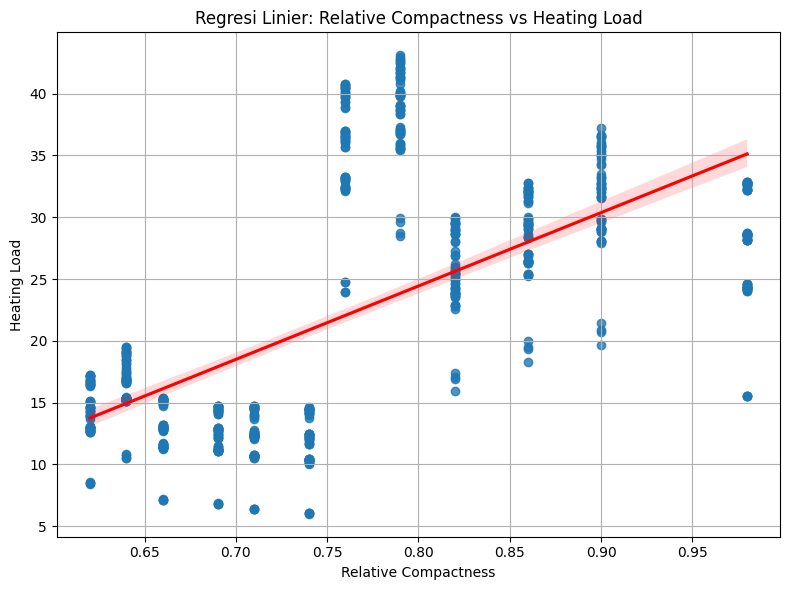

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='relative_compactness', y='heating_load', data=df, line_kws={'color': 'red'})
plt.title('Regresi Linier: Relative Compactness vs Heating Load')
plt.xlabel('Relative Compactness')
plt.ylabel('Heating Load')
plt.grid(True)
plt.tight_layout()
plt.show()

Garis regresi (berwarna merah) menunjukkan tren yang menanjak secara konsisten dari kiri ke kanan. Ini mengindikasikan adanya korelasi positif yang kuat antara Relative Compactness dan Heating Load. Dengan kata lain, semakin tinggi nilai kekompakan relatif sebuah bangunan, semakin tinggi pula beban pemanasannya.

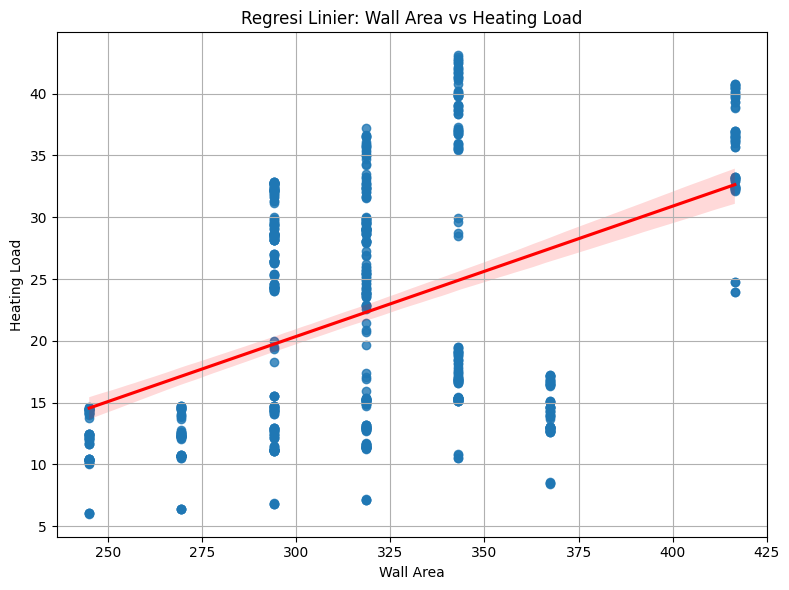

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='wall_area', y='heating_load', data=df, line_kws={'color': 'red'})

plt.title('Regresi Linier: Wall Area vs Heating Load')
plt.xlabel('Wall Area')
plt.ylabel('Heating Load')
plt.grid(True)
plt.tight_layout()
plt.show()

Garis regresi berwarna merah yang menanjak dari kiri ke kanan dengan jelas menunjukkan adanya korelasi positif antara Wall Area dan Heating Load. Secara intuitif, ini masuk akal: semakin luas area dinding suatu bangunan, semakin besar potensi kehilangan panas, sehingga semakin tinggi beban pemanasannya.

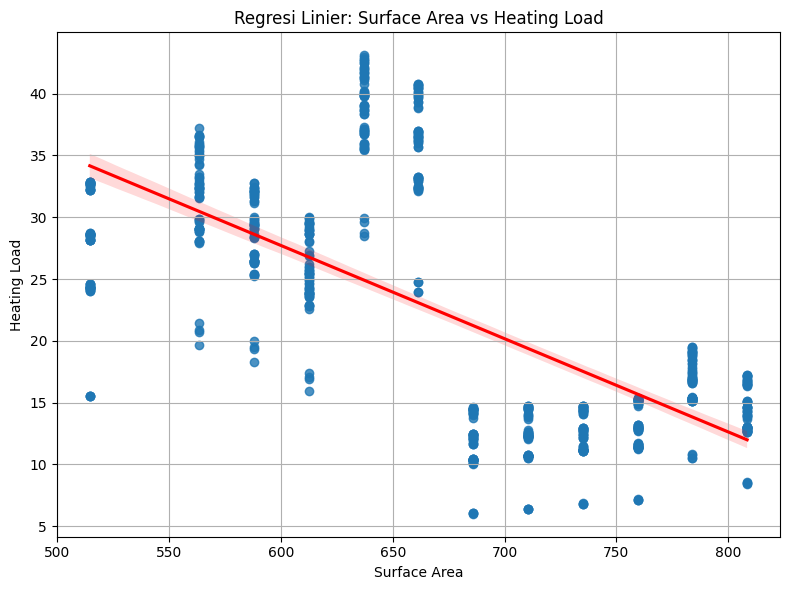

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='surface_area', y='heating_load', data=df, line_kws={'color': 'red'})

plt.title('Regresi Linier: Surface Area vs Heating Load')
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.grid(True)
plt.tight_layout()
plt.show()

Analisa: Diagram ini menunjukkan korelasi negatif yang jelas. Garis regresi (merah) menurun dari kiri ke kanan. Namun, Hasil ini terlihat tidak intuitif. Secara fisika, luas permukaan yang lebih besar seharusnya menyebabkan kehilangan panas yang lebih besar dan, akibatnya, beban pemanasan yang lebih tinggi. Adanya korelasi negatif yang kuat ini menunjukkan adanya interaksi yang kompleks dengan variabel lain atau karakteristik unik dari dataset ini.

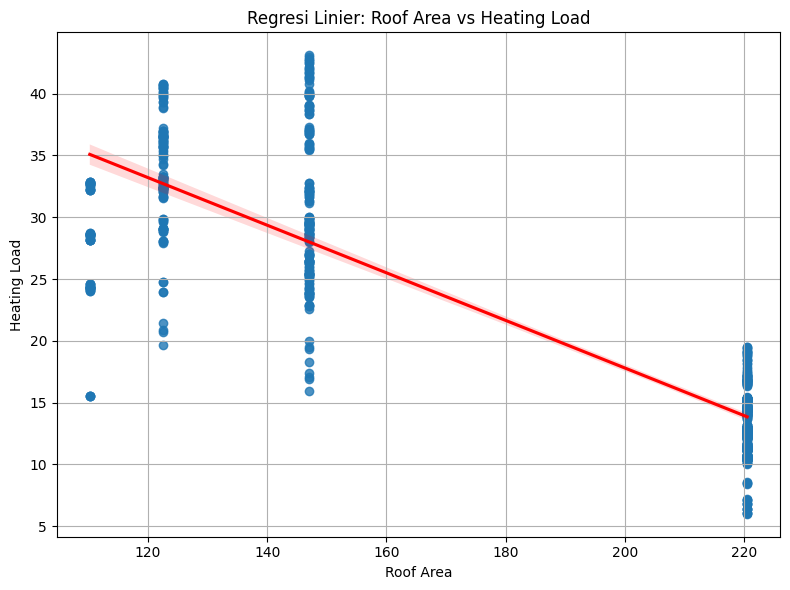

In [6]:
plt.figure(figsize=(8, 6))
sns.regplot(x='roof_area', y='heating_load', data=df, line_kws={'color': 'red'})

plt.title('Regresi Linier: Roof Area vs Heating Load')
plt.xlabel('Roof Area')
plt.ylabel('Heating Load')
plt.grid(True)
plt.tight_layout()
plt.show()

Analisa: Diagram ini menunjukkan korelasi positif yang sangat kuat dan jelas. Garis regresi menanjak secara tajam. Hasil ini sangat masuk akal. Nilai Relative Compactness yang tinggi menunjukkan bentuk bangunan yang kurang kompak (lebih banyak luas permukaan relatif terhadap volume). Bangunan yang kurang kompak lebih tidak efisien dalam mempertahankan panas, sehingga membutuhkan beban pemanasan yang lebih tinggi.

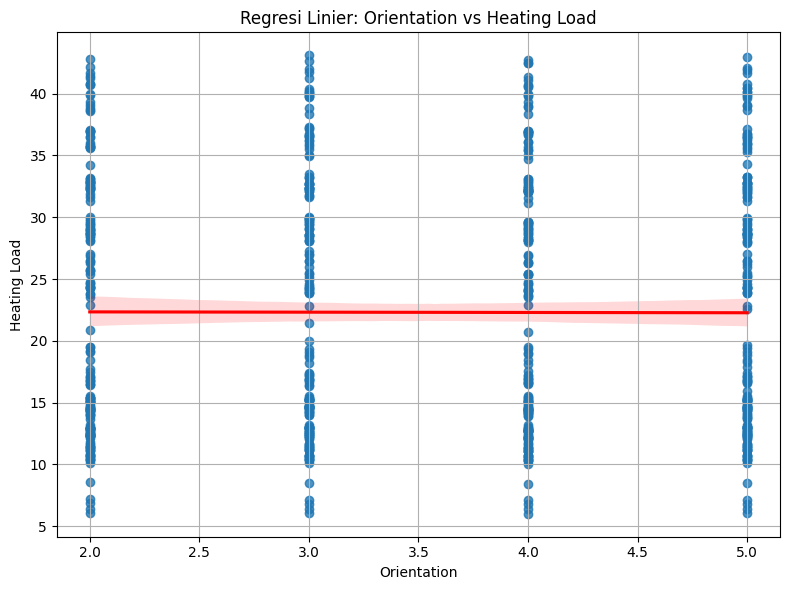

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='orientation', y='heating_load', data=df, line_kws={'color': 'red'})
plt.title('Regresi Linier: Orientation vs Heating Load')
plt.xlabel('Orientation')
plt.ylabel('Heating Load')
plt.grid(True)
plt.tight_layout()
plt.show()

Garis regresi hampir sepenuhnya datar (horizontal). Kemiringan (slope) garis mendekati nol. Ini menunjukkan tidak adanya korelasi linear antara orientasi bangunan (yang diwakili oleh angka 2, 3, 4, 5) dan beban pemanasan. Nilai rata-rata "Heating Load" hampir sama untuk semua orientasi.

**Analisa Akhir terhadap semua prediktor:**

Setelah membandingkan keenam diagram, Relative Compactness (Kekompakan Relatif) adalah prediktor yang paling kuat, paling jelas, dan paling dapat diandalkan untuk menentukan "Heating Load". Hubungannya tidak hanya kuat secara statistik tetapi juga didukung oleh penjelasan fisis yang logis mengenai efisiensi termal bangunan.

In [ ]:
# Hitung korelasi hanya untuk fitur numerik
corr_matrix = df.corr(numeric_only=True)

# Ambil korelasi ke Cooling Load
corr_cooling = corr_matrix['cooling_load'].drop(['cooling_load'], errors='ignore')

# Buang fitur Cooling Load jika masih ikut muncul
if 'heating_load' in corr_cooling.index:
    corr_cooling = corr_cooling.drop('heating_load')

# Top 3 korelasi positif dan negatif
top3_positif_cooling = corr_cooling.sort_values(ascending=False).head(3)
top2_negatif_cooling = corr_cooling.sort_values().head(2)

# Tampilkan hasil
print("🔵 Top 3 Korelasi Positif terhadap Cooling Load:")
print(top3_positif_cooling)
print("\n🔴 Top 2 Korelasi Negatif terhadap Cooling Load:")
print(top2_negatif_cooling)

🔵 Top 3 Korelasi Positif terhadap Cooling Load:
overall_height          0.895785
relative_compactness    0.634339
wall_area               0.427117
Name: cooling_load, dtype: float64

🔴 Top 2 Korelasi Negatif terhadap Cooling Load:
roof_area      -0.862547
surface_area   -0.672999
Name: cooling_load, dtype: float64


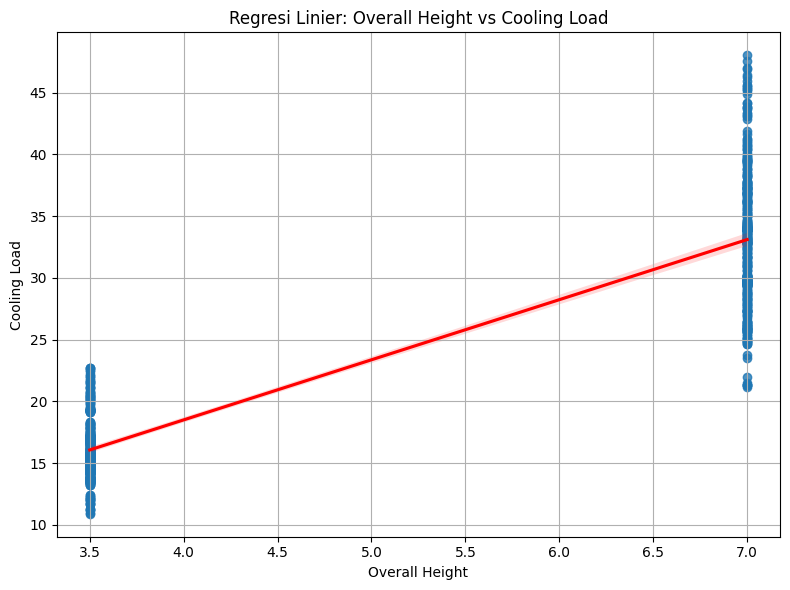

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='overall_height', y='cooling_load', data=df, line_kws={'color': 'red'})
plt.title('Regresi Linier: Overall Height vs Cooling Load')
plt.xlabel('Overall Height')
plt.ylabel('Cooling Load')
plt.grid(True)
plt.tight_layout()
plt.show()

Analisa: Garis regresi (berwarna merah) menunjukkan kemiringan menanjak yang sangat curam dan jelas. Ini mengindikasikan adanya korelasi positif yang sangat kuat antara Overall Height dan Cooling Load. Artinya, semakin tinggi sebuah bangunan, semakin tinggi pula beban pendinginannya.

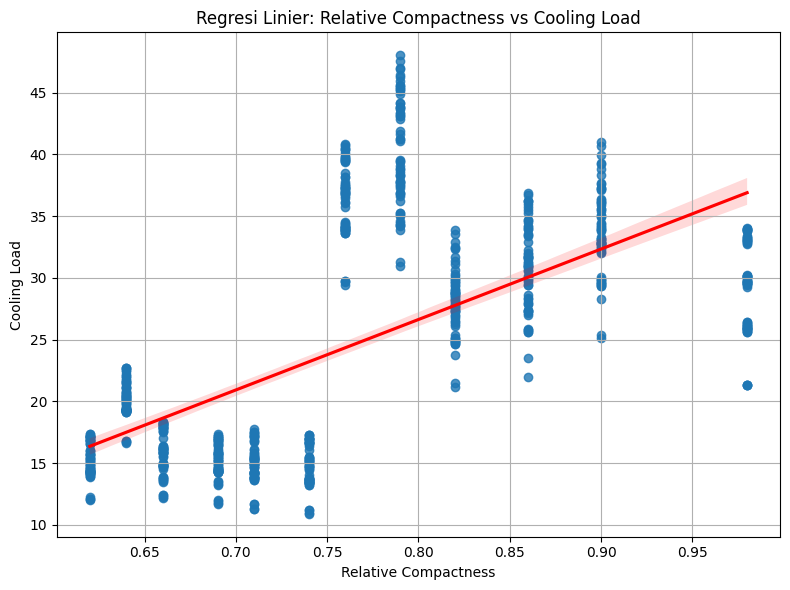

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='relative_compactness', y='cooling_load', data=df, line_kws={'color': 'red'})

plt.title('Regresi Linier: Relative Compactness vs Cooling Load')
plt.xlabel('Relative Compactness')
plt.ylabel('Cooling Load')
plt.grid(True)
plt.tight_layout()
plt.show()

Analisa: Garis regresi (berwarna merah) dengan jelas menunjukkan tren yang menanjak secara konsisten dari kiri ke kanan. Ini mengindikasikan adanya korelasi positif yang sangat kuat antara Relative Compactness dan Cooling Load. Semakin tinggi nilai kekompakan relatif sebuah bangunan, semakin tinggi pula beban pendinginannya (cooling load).

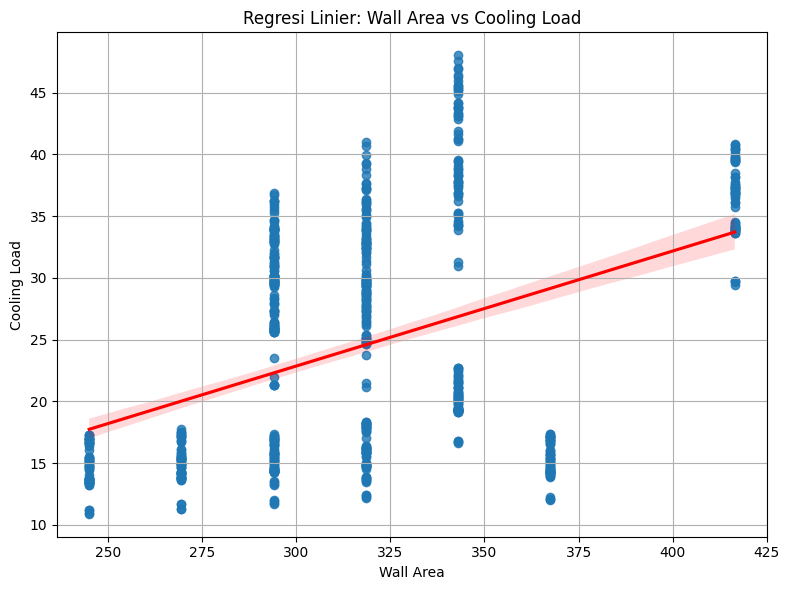

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='wall_area', y='cooling_load', data=df, line_kws={'color': 'red'})

plt.title('Regresi Linier: Wall Area vs Cooling Load')
plt.xlabel('Wall Area')
plt.ylabel('Cooling Load')
plt.grid(True)
plt.tight_layout()
plt.show()

Analisa: Garis regresi berwarna merah yang menanjak dari kiri ke kanan menunjukkan adanya korelasi positif antara Wall Area dan Cooling Load. Secara umum, semakin luas area dinding suatu bangunan, semakin tinggi pula beban pendinginannya. Hal ini masuk akal karena dinding yang lebih luas memberikan area yang lebih besar bagi panas dari luar (terutama radiasi matahari) untuk masuk ke dalam gedung, sehingga membutuhkan lebih banyak energi untuk pendinginan.

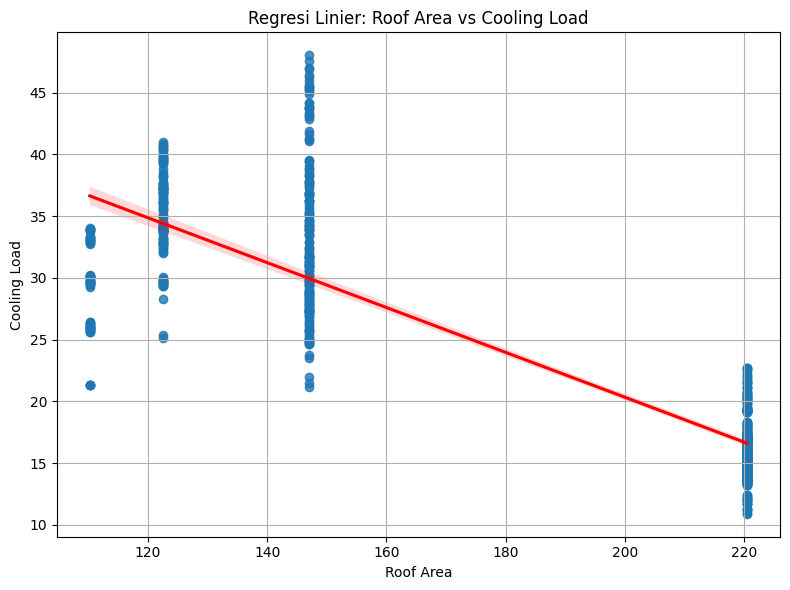

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='roof_area', y='cooling_load', data=df, line_kws={'color': 'red'})

plt.title('Regresi Linier: Roof Area vs Cooling Load')
plt.xlabel('Roof Area')
plt.ylabel('Cooling Load')
plt.grid(True)
plt.tight_layout()
plt.show()

Analisa: Garis regresi (berwarna merah) dengan jelas menunjukkan tren yang menurun dari kiri ke kanan. Ini mengindikasikan adanya korelasi negatif antara Roof Area dan Cooling Load. Berdasarkan data ini, semakin besar Luas Atap (Roof Area) sebuah bangunan, justru semakin rendah Beban Pendinginannya (Cooling Load).

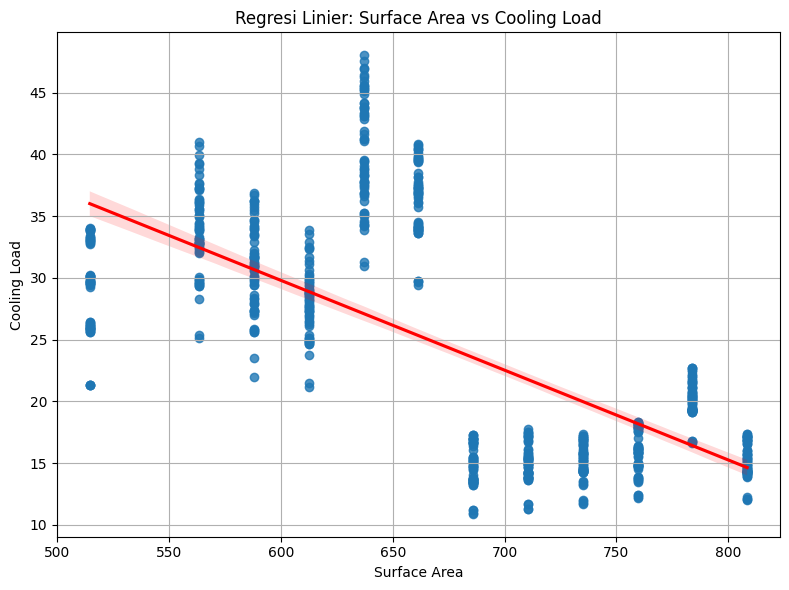

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='surface_area', y='cooling_load', data=df, line_kws={'color': 'red'})

plt.title('Regresi Linier: Surface Area vs Cooling Load')
plt.xlabel('Surface Area')
plt.ylabel('Cooling Load')
plt.grid(True)
plt.tight_layout()
plt.show()

Analisa: Garis regresi (berwarna merah) dengan jelas menunjukkan tren yang menurun dari kiri ke kanan. Ini mengindikasikan adanya korelasi negatif antara Surface Area dan Cooling Load. Berdasarkan data ini, bangunan dengan Luas Permukaan (Surface Area) yang lebih besar cenderung memiliki Beban Pendinginan (Cooling Load) yang lebih rendah.

**Analisa akhir terhadap semua prediktor:**

Setelah membandingkan semua diagram, Relative Compactness (Kekompakan Relatif) adalah prediktor yang paling kuat, paling jelas, dan paling dapat diandalkan untuk menentukan Cooling Load.

Variabel ini tidak hanya menunjukkan hubungan statistik yang kuat, tetapi juga didukung oleh penjelasan fisis yang paling logis dan konsisten terkait efisiensi termal sebuah bangunan.

# 4.) PEMISAHAN DATA FITUR DAN TARGET

In [ ]:
X = df.drop(columns=['heating_load', 'cooling_load'])
X = sm.add_constant(X)
y_heat = df['heating_load']
y_cool = df['cooling_load']

# 5.) PEMBUATAN MODEL REGRESI LINEAR

In [ ]:
heat_model = sm.OLS(y_heat, X).fit()
cool_model = sm.OLS(y_cool, X).fit()

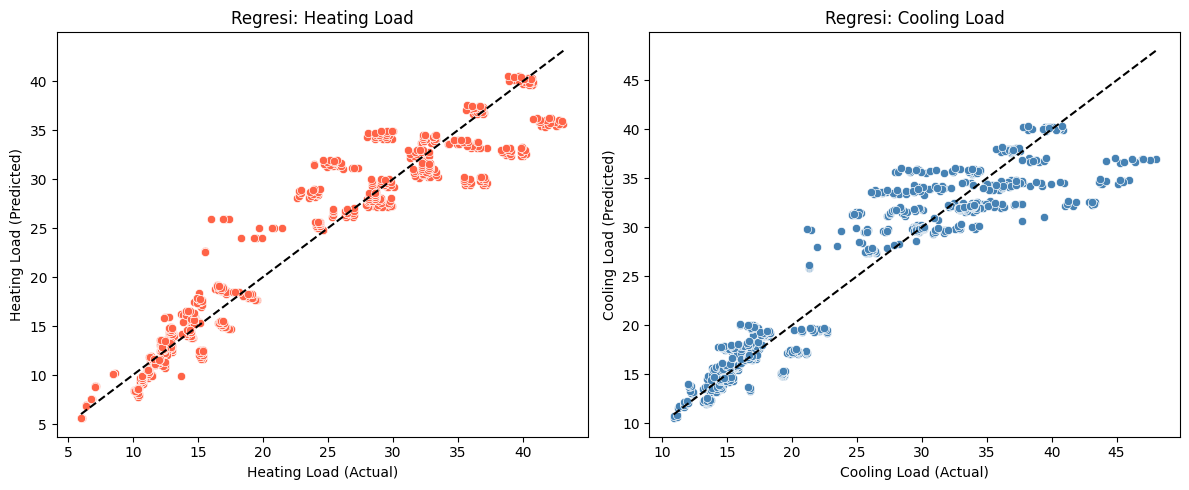

In [ ]:
# Prediksi dari model
y_heat_pred = heat_model.predict(X)
y_cool_pred = cool_model.predict(X)

# 1. Plot Heating Load
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_heat, y=y_heat_pred, color='tomato')
plt.plot([y_heat.min(), y_heat.max()], [y_heat.min(), y_heat.max()], 'k--')
plt.xlabel('Heating Load (Actual)')
plt.ylabel('Heating Load (Predicted)')
plt.title('Regresi: Heating Load')

# 2. Plot Cooling Load
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_cool, y=y_cool_pred, color='steelblue')
plt.plot([y_cool.min(), y_cool.max()], [y_cool.min(), y_cool.max()], 'k--')
plt.xlabel('Cooling Load (Actual)')
plt.ylabel('Cooling Load (Predicted)')
plt.title('Regresi: Cooling Load')

plt.tight_layout()
plt.show()

In [ ]:
r2_heat = heat_model.rsquared
r2_cool = cool_model.rsquared

print(f"R-squared (Heating Load): {r2_heat.round(3)}")
print(f"R-squared (Cooling Load): {r2_cool.round(3)}")

R-squared (Heating Load): 0.916
R-squared (Cooling Load): 0.888


# 6.) INFERENSI STATISTIK KESELURUHAN

In [ ]:
p_values = heat_model.pvalues
print(p_values.round(3))

const                        0.000
relative_compactness         0.000
surface_area                 0.000
wall_area                    0.000
roof_area                    0.000
overall_height               0.000
orientation                  0.805
glazing_area                 0.000
glazing_area_distribution    0.004
dtype: float64


In [ ]:
p_values = cool_model.pvalues
print(p_values.round(3))

const                        0.000
relative_compactness         0.000
surface_area                 0.000
wall_area                    0.000
roof_area                    0.000
overall_height               0.000
orientation                  0.240
glazing_area                 0.000
glazing_area_distribution    0.594
dtype: float64


In [ ]:
CI_p = heat_model.conf_int(alpha=0.05)
print(CI_p.round(3))

                                0        1
const                      46.649  121.378
relative_compactness      -84.973  -44.574
surface_area               -0.089   -0.036
wall_area                   0.029    0.044
roof_area                  -0.064   -0.035
overall_height              3.506    4.833
orientation                -0.209    0.163
glazing_area               18.335   21.531
glazing_area_distribution   0.067    0.341


In [ ]:
CI_p = cool_model.conf_int(alpha=0.05)
print(CI_p.round(3))

                                0        1
const                      56.483  138.009
relative_compactness      -92.824  -48.751
surface_area               -0.095   -0.037
wall_area                   0.014    0.031
roof_area                  -0.060   -0.028
overall_height              3.560    5.008
orientation                -0.081    0.324
glazing_area               12.974   16.460
glazing_area_distribution  -0.109    0.190
